In [21]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 24

@author: yaning
"""

import HH as HH
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [22]:
importlib.reload(HH)

<module 'HH' from '/home/yaning/Documents/Spiking_NN/HH.py'>

In [10]:
# simulation environment
deltaTms = 0.05
Cm = 1
Vm = 0
# 5000 cycles and every cycle is 0.05ms
# in total 250ms
pointCount = 5000
voltages = np.empty(pointCount)
times = np.arange(pointCount) * 0.05
stim = np.zeros(pointCount)
stim[1200:3800] = 20  # create a square pulse


In [23]:
# channel constants
gMax_Na = 120
gMax_K = 26
gMax_leaky = 0.3
gP = 1
rE_Na = 115
rE_K = -12
rE_leaky = 10.6

gMax_AMPA = 120
gMax_NMDA = 50
gMax_GABA = 100
rE_AMPA = 60
rE_NMDA = 60
rE_GABA = 60
w_init_AMPA = 0.7
e_init_AMPA = 1
g_decay_AMPA = 1
g_rise_AMPA = 1
# record past events
past_pre = []
past_post = []

# presynapse firing
tsp_pre = [500,2000,3500]
tsp_post = [550, 2200, 3000]

learning_rate = 0.3

#tau_pre, tau_rec, tau_decay, tau_rise, u_se,  w, e, g_decay, g_rise,
#past_pre, past_post
AMPA_params = [10, 5, 20, 10, 0.5, w_init_AMPA, 
               e_init_AMPA, g_decay_AMPA, g_rise_AMPA,
               past_pre, past_post, tsp_pre, tsp_post,
               learning_rate]

In [24]:
# gate states for voltage gated channels
# they share the same m,n,h
m = HH.Gate(0,0,0)
n = HH.Gate(0,0,0)
h = HH.Gate(0,0,0)

sodium_channel = HH.Voltage_Sodium(gMax_Na, gP, rE_Na, Vm)
potassium_channel = HH.Voltage_Potassium(gMax_K, gP, rE_K, Vm)
leaky_channel = HH.Voltage_Leak(gMax_leaky, gP, rE_leaky, Vm)

ampa_receptor = HH.LigandGatedChannel(gMax_AMPA, gP, rE_AMPA, Vm, AMPA_params)


# m.init_update(m, n, h, deltaTms)
# n.init_update(m, n, h, deltaTms)

for i in range(len(times)):

    sodium_channel.update_gP(m, n, h, deltaTms)
    potassium_channel.update_gP(m, n, h, deltaTms)

    ampa_receptor.update_gP(i, deltaTms)
    


    # get the currents
    INa = sodium_channel.current()
    IK = potassium_channel.current()
    Ileak = leaky_channel.current()
    Iampa = ampa_receptor.current()

    # sum the currents
    Isum = stim[i] - INa - IK - Ileak - Iampa
    Vm += deltaTms * Isum / Cm

    voltages[i] = Vm

    # update the voltages for each channel
    sodium_channel.Vm = Vm
    potassium_channel.Vm = Vm
    leaky_channel.Vm = Vm
    ampa_receptor.Vm = Vm




0.011178186229231502
0.01221071729974161
-0.04063494822941202
-175.144894424024
-inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

/home/yaning/Documents/Spiking_NN/HH.py:56: RuntimeWarning: overflow encountered in exp
  m.alpha = .1*((25-self.Vm) / (np.exp((25-self.Vm)/10)-1))
/home/yaning/Documents/Spiking_NN/HH.py:57: RuntimeWarning: overflow encountered in exp
  m.beta = 4*np.exp(-self.Vm/18)
/home/yaning/Documents/Spiking_NN/HH.py:58: RuntimeWarning: overflow encountered in exp
  n.alpha = .01 * ((10-self.Vm) / (np.exp((10-self.Vm)/10)-1))
/home/yaning/Documents/Spiking_NN/HH.py:59: RuntimeWarning: overflow encountered in exp
  n.beta = .125*np.exp(-self.Vm/80)
/home/yaning/Documents/Spiking_NN/HH.py:60: RuntimeWarning: overflow encountered in exp
  h.alpha = .07*np.exp(-self.Vm/20)
/home/yaning/Documents/Spiking_NN/HH.py:61: RuntimeWarning: overflow encountered in exp
  h.beta = 1/(np.exp((30-self.Vm)/10)+1)
/home/yaning/Documents/Spiking_NN/HH.py:25: RuntimeWarning: invalid value encountered in scalar multiply
  alphaState = self.alpha * (1-self.state)
/home/yaning/Documents/Spiking_NN/HH.py:26: RuntimeWarn

AttributeError: 'LigandGatedChannel' object has no attribute 'learning_rate'

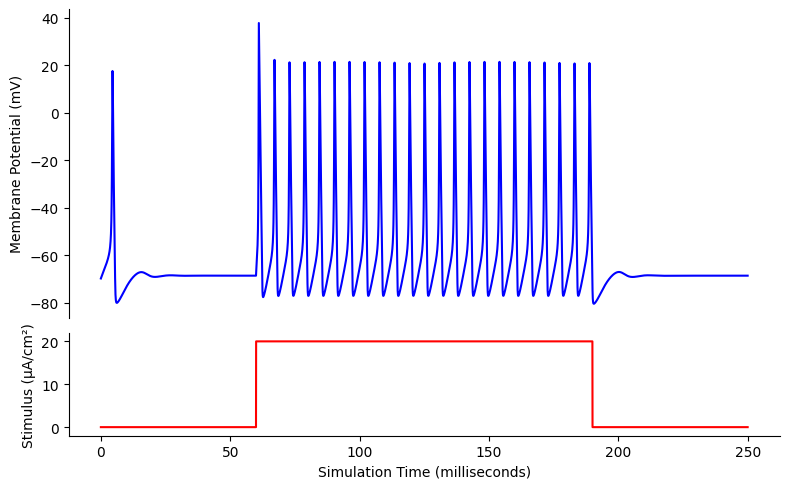

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(times, voltages - 70, 'b')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

ax2.plot(times, stim, 'r')
ax2.set_ylabel("Stimulus (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.margins(0, 0.1)
plt.tight_layout()
# plt.savefig("dev/concept4.png")
plt.show()

In [13]:
voltages

array([0.15900336, 0.31576091, 0.47063907, ..., 1.34588156, 1.3458793 ,
       1.34587708])